##### GLDADec (Our Proposed) deconvolution on GSE107572
- We downloaded the processed data from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE107572.
- 9 samples derived from human PBMC/PMN cells.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

BASE_DIR = '/workspace/github/GLDADec' # cloning repository
import sys
sys.path.append(BASE_DIR)

from run import pipeline

***
#### Load data

In [2]:
raw_df = pd.read_csv(BASE_DIR+'/data/GSE107572/GSE107572_expression.csv',index_col=0)
domain_dic = pd.read_pickle(BASE_DIR+'/data/marker/human_blood_domain.pkl')
random_sets = pd.read_pickle(BASE_DIR+'/data/random_info/100_random_sets.pkl')
target_facs = pd.read_csv(BASE_DIR+'/data/GSE107572/facs.csv',index_col=0)/100

***
#### Process marker information

In [3]:
# B cells
bcandi = []
bcandi.extend(domain_dic.get('B cells memory'))
bcandi.extend(domain_dic.get('B cells naive'))

# CD4 cells
cd4candi = []
cd4candi.extend(domain_dic.get('T cells CD4 memory'))
cd4candi.extend(domain_dic.get('T cells CD4 naive'))

# CD8 cels
cd8candi = domain_dic.get('T cells CD8')

# NK cells
nkcandi = domain_dic.get('NK cells')

# Monocytes
moncandi = domain_dic.get('Monocytes')

# Neutrophils
neucandi = domain_dic.get('Neutrophils')

# Dendritic cells
dccandi = domain_dic.get('Dendritic cells')

# Treg
tregcandi = domain_dic.get('Treg')

# generate original marker dict
k = ['B cells','T cells CD4','T cells CD8','NK cells','Monocytes','Neutrophils','Dendritic cells','Treg']
v = [bcandi,cd4candi,cd8candi,nkcandi,moncandi,neucandi,dccandi,tregcandi]
final_dic = dict(zip(k,v))

***
#### Conduct GLDADec
- We added 100 genes with large coefficients of variation between samples.
- The cell types to be evaluated are as follows:
    1. 'B'
    2. 'CD4 T'
    3. 'CD8 T'
    4. 'Monocytes'
    5. 'NK'
    6. 'Neutrophils'
    7. 'Treg'
    8. 'Dendritic cells'

  0%|          | 0/10 [00:00<?, ?it/s]

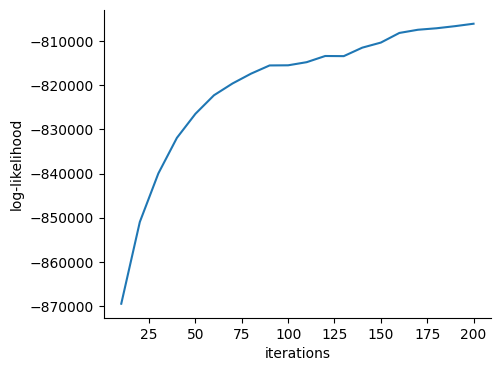

cells in res : ['B cells', 'T cells CD4', 'T cells CD8', 'NK cells', 'Monocytes', 'Neutrophils', 'Dendritic cells', 'Treg']
cells in ref : ['B', 'CD4T', 'CD8T', 'NK', 'Mon', 'Neu', 'myeloid dendritic cells', 'Treg']


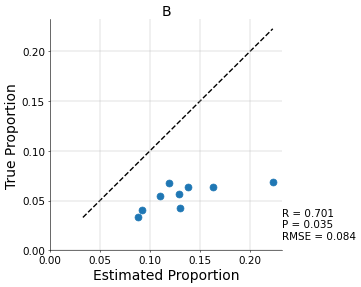

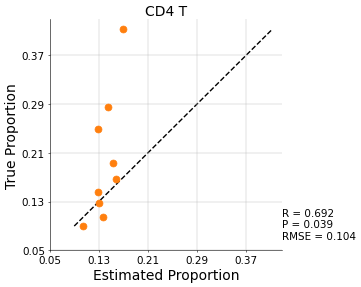

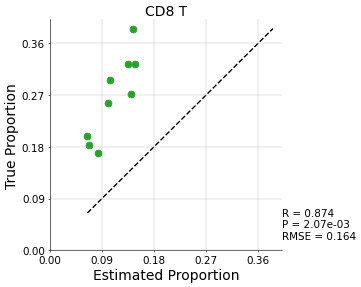

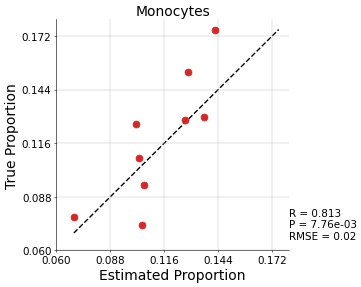

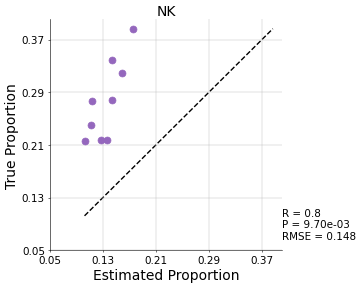

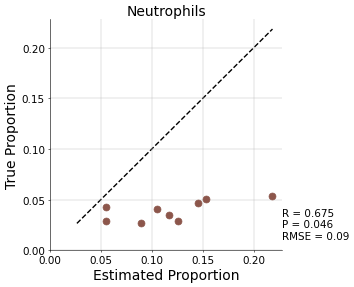

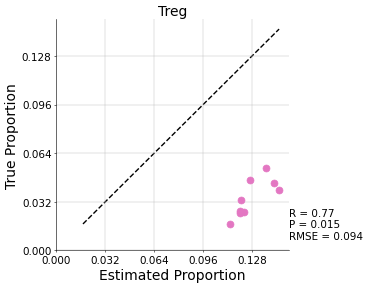

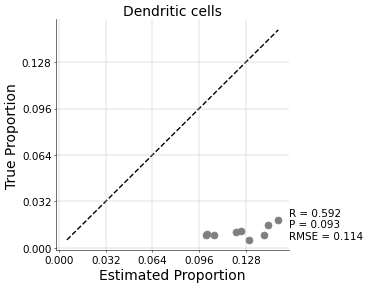

{'B': [('R', 0.701), ('P', 0.035), ('RMSE', 0.0839)],
 'CD4 T': [('R', 0.692), ('P', 0.039), ('RMSE', 0.1035)],
 'CD8 T': [('R', 0.8739), ('P', '2.07e-03'), ('RMSE', 0.1644)],
 'Dendritic cells': [('R', 0.5919), ('P', 0.093), ('RMSE', 0.1144)],
 'Monocytes': [('R', 0.8127), ('P', '7.76e-03'), ('RMSE', 0.0199)],
 'NK': [('R', 0.7995), ('P', '9.70e-03'), ('RMSE', 0.1478)],
 'Neutrophils': [('R', 0.6748), ('P', 0.046), ('RMSE', 0.0898)],
 'Treg': [('R', 0.7698), ('P', 0.015), ('RMSE', 0.0935)]}


In [4]:
# single run and eval
# conduct deconv
pp = pipeline.Pipeline(verbose=False)
pp.from_predata(raw_df,target_samples=[],
                    do_ann=False,linear2log=False,log2linear=False,do_drop=True,do_batch_norm=False,do_quantile=False)
pp.gene_selection(method='CV',outlier=True,topn=100)
pp.add_marker_genes(target_cells=['B cells','T cells CD4','T cells CD8','NK cells','Monocytes','Neutrophils','Dendritic cells','Treg'],add_dic=final_dic)
pp.deocnv_prep(random_sets=random_sets,do_plot=False,specific=True,prior_norm=True,norm_scale=200,minmax=False,mm_scale=10)
pp.deconv(n=10,add_topic=0,n_iter=200,alpha=0.01,eta=0.01,refresh=10,initial_conf=1.0,seed_conf=1.0,other_conf=0.0,ll_plot=True,var_plot=False)
res = pp.merge_total_res

pp.evaluate(facs_df=target_facs,deconv_norm_range=['B cells','T cells CD4','T cells CD8','NK cells','Monocytes','Neutrophils','Dendritic cells','Treg'],
                facs_norm_range=['B','CD4T','CD8T','NK','Mon','Neu','myeloid dendritic cells','Treg'],
                res_names=[['B cells'],['T cells CD4'],['T cells CD8'],['NK cells'],['Monocytes'],['Neutrophils'],['Dendritic cells'],['Treg']],
                ref_names=[['B'],['CD4T'],['CD8T'],['NK'],['Mon'],['Neu'],['myeloid dendritic cells'],['Treg']],
                title_list = ['B','CD4 T','CD8 T','Monocytes','NK','Neutrophils','Treg','Dendritic cells'],
                dpi=50,multi=False)

In [5]:
res = pp.merge_total_res[0]
display(res)
res.to_csv(BASE_DIR+'/baselines_eval/Proposed/Proposed_GSE107572_Results.csv')

,B cells,T cells CD4,T cells CD8,NK cells,Monocytes,Neutrophils,Dendritic cells,Treg
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 4,0.109123,0.137682,0.136015,0.149127,0.079676,0.119458,0.124014,0.144905
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 7,0.076824,0.136576,0.143396,0.162827,0.090122,0.174538,0.104620,0.111097
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 12,0.108319,0.175294,0.132189,0.151224,0.107362,0.062947,0.108269,0.154396
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 2,0.072662,0.151076,0.068012,0.115139,0.090788,0.240917,0.101427,0.159981
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 9,0.093339,0.138479,0.099235,0.160036,0.128848,0.141674,0.118407,0.119982
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 1,0.141451,0.182118,0.080836,0.122089,0.101824,0.102049,0.097491,0.172143
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 6,0.099904,0.143556,0.102424,0.120581,0.115541,0.166531,0.105981,0.145483
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 10,0.184631,0.173860,0.063259,0.087985,0.140657,0.069700,0.101144,0.178764
BLOOD-DERIVED IMMUNE-CELL MIXTURE FROM DONOR 5,0.115285,0.115168,0.139976,0.129982,0.112581,0.134862,0.122928,0.129218
